# TASK 2 - TIER C: The Transformer

## Goal
Fine-tune **DistilBERT** with **LoRA (Low-Rank Adaptation)** to perform 3-class classification using the full power of transformers.

---

## The Approach

### What We're Building
- **Input:** Raw text (tokenized by DistilBERT tokenizer)
- **Output:** 3-class prediction (Human, AI Vanilla, AI Styled)
- **Method:** Transformer with self-attention + LoRA fine-tuning

### The Philosophy

```
Tier A (Statistician): HOW you write (structure, variance)
   ↓
Tier B (Semanticist): WHAT words you use (meanings via GloVe)
   ↓
Tier C (Transformer): BOTH + word order + context + attention
```

**Tier A (91%)** captured sentence variance (11x human signal)

**Tier B (95%)** captured Victorian semantic gap (170-year language evolution)

**Tier C** should capture EVERYTHING:
- ✅ Structure (via position embeddings)
- ✅ Semantics (via contextual embeddings)
- ✅ Word order (preserved in transformer)
- ✅ Long-range dependencies (self-attention)
- ✅ Grammar patterns (pre-trained knowledge)

---

## Research Question

**"Can transformers achieve >95% accuracy by capturing both structural and semantic signals simultaneously?"**

### Hypothesis

**Prediction:** Tier C will achieve **96-98% accuracy** (highest of all tiers)

**Reasoning:**
1. Tier A captured structure → 91% accuracy
2. Tier B captured semantics → 95% accuracy
3. Tier C captures BOTH → Should beat 95%
4. Biggest gain expected: **AI_Styled class** (90-95% vs Tier B's 80%)

**Why Transformers Should Win:**

| Signal | Tier A | Tier B | Tier C |
|--------|--------|--------|--------|
| **Sentence Variance** | ✅ | ❌ | ✅ (position) |
| **Word Meanings** | ❌ | ✅ (static) | ✅ (contextual) |
| **Word Order** | ❌ | ❌ (lost) | ✅ |
| **Context** | ❌ | ❌ | ✅ (attention) |
| **Grammar** | ❌ | ❌ | ✅ (pre-trained) |

**Alternative Outcomes:**
- If Tier C ≈ 95% (similar to Tier B) → Semantic gap is so strong, structure doesn't add value
- If Tier C > 97% → Transformers are gold standard, justify the complexity

---

## Why Transformers?

### Self-Attention: The Magic Ingredient

**Example:**
```
Text: "The bank by the river is beautiful."

GloVe (Tier B):
   bank → Always same vector (financial institution OR river edge?)

Transformer (Tier C):
   bank ← attends to → river (high weight)
   bank ← attends to → beautiful (medium weight)
   Result: bank = river bank (contextual understanding)
```

### What Transformers Capture (That Tier A & B Missed)

**1. Syntactic Patterns**
- Victorian: "It was the best of times, it was the worst of times..." (parallel structure)
- Modern AI: "The era presented a paradox. Opportunities flourished..." (simple SVO)

**2. Long-Range Dependencies**
- "Mr. Darcy entered. His manner was cold. Elizabeth observed **him**." → him = Darcy

**3. Style Inconsistency**
- AI_Styled: Starts formal, slips into modern syntax mid-paragraph
- Transformer: Detects register shifts

**4. Anachronisms**
- Word "computer" in Victorian text → High AI probability

---

## LoRA: Efficient Fine-Tuning

### The Problem

**Traditional Fine-Tuning:**
- Update ALL 66 million DistilBERT parameters
- Requires 16GB+ GPU
- Slow (hours)
- Risk of catastrophic forgetting

**LoRA Solution:**
- Freeze base model (66M params)
- Add tiny trainable matrices (~1-2M params)
- Requires 6-8GB GPU (Colab free tier OK!)
- Fast (15-20 minutes)
- Preserves pre-trained knowledge

### How LoRA Works

```
Traditional: Update W (768×768) = 589,824 params

LoRA: W (frozen) + A×B where:
   A = [768 × 8] = 6,144 params
   B = [8 × 768] = 6,144 params
   Total: Only 12,288 trainable (2% of original!)
```

**Magic:** Despite training only 2%, achieves 95-99% of full fine-tuning performance!

---

## Model Architecture

```
Input Text: "The rain in Spain stays mainly in the plain."
   ↓
Tokenizer: [CLS] the rain in spain ... [SEP]
   ↓
DistilBERT Backbone (frozen + LoRA):
   - Token Embeddings (768d per token)
   - Position Embeddings (word order)
   - 6 Transformer Layers with Self-Attention
   - LoRA adapters in query/value projections
   - [CLS] token accumulates sentence-level info
   ↓
Classification Head (trainable):
   - Dense(768 → 256) + ReLU + Dropout(0.3)
   - Dense(256 → 3) + Softmax
   ↓
Output: [P(Human), P(AI_Vanilla), P(AI_Styled)]
```

**Key Hyperparameters:**
- Model: `distilbert-base-uncased` (66M params)
- LoRA rank: r=8, alpha=16
- Learning rate: 2e-5 (standard for transformers)
- Batch size: 16 (fits in 8GB GPU)
- Epochs: 3-5 (transformers learn fast)
- Max length: 256 tokens (our paragraphs ~150 words)

---

## Expected Results

| Metric | Tier A | Tier B | **Tier C (Predicted)** |
|--------|--------|--------|----------------------|
| **Overall** | 91% | 95% | **96-98%** |
| **Human** | 99% | 99% | **99-100%** |
| **AI_Vanilla** | 88% | 98% | **98-100%** |
| **AI_Styled** | 75% | 80% | **90-95%** ⭐ |

**Key Improvement:** AI_Styled detection (+10-15% over Tier B)
- **Why:** Attention mechanism sees through style mimicry
- **How:** Detects modern syntax patterns hidden in Victorian vocabulary

---

## Expected Challenges

1. **GPU Memory:** 6-8GB minimum (use Colab if needed)
2. **Training Time:** 15-20 minutes (vs 10 min Tier B, 1 min Tier A)
3. **Overfitting Risk:** 66M params, only 800 training samples (LoRA mitigates this)
4. **Hyperparameter Sensitivity:** Learning rate matters!

**Solutions:**
- LoRA reduces memory requirements
- Dropout + early stopping prevent overfitting
- Use proven defaults (lr=2e-5, r=8, alpha=16)
- Class weights for imbalance

---

## Success Criteria

**Tier C is "successful" if:**
1. ✅ Beats Tier B (>95.5%)
2. ✅ Improves AI_Styled (>85%)
3. ✅ Justifies complexity (accuracy gain worth compute cost)

**Tier C is "exceptional" if:**
1. 🌟 Achieves >97% overall
2. 🌟 AI_Styled >90%
3. 🌟 Zero human errors (100%)

---

**Let's build it!** 🚀

---

## Step 1: Install & Import Libraries

In [2]:
# Install required libraries (run once)
!pip install -q transformers datasets peft accelerate

print("✅ Installation complete!")

✅ Installation complete!


In [3]:
# Core libraries
import json
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# PyTorch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# Transformers & LoRA
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from peft import LoraConfig, get_peft_model, TaskType

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
from sklearn.utils.class_weight import compute_class_weight

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"✅ All libraries imported successfully!")
print(f"   PyTorch version: {torch.__version__}")
print(f"   Device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print(f"   ⚠️ No GPU detected - training will be slow. Consider using Google Colab.")

✅ All libraries imported successfully!
   PyTorch version: 2.8.0+cu128
   Device: cpu
   ⚠️ No GPU detected - training will be slow. Consider using Google Colab.


---

## Step 2: Load Dataset

Same dataset as Tier A and Tier B.

In [4]:
# Define paths
DATA_DIR = Path('../TASK0/data/dataset/twain_austen')
CLASS1_FILE = DATA_DIR / 'class1_human.jsonl'
CLASS2_FILE = DATA_DIR / 'class2.txt'
CLASS3_FILE = DATA_DIR / 'class3.txt'

print("Loading datasets...\n")

# Load Class 1 (Human - JSONL format)
class1_texts = []
if CLASS1_FILE.exists():    
    with open(CLASS1_FILE, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                data = json.loads(line.strip())
                class1_texts.append(data['text'])
    print(f"✅ Class 1 (Human): {len(class1_texts)} paragraphs loaded")
else:
    print(f"❌ Class 1 file not found: {CLASS1_FILE}")

# Load Class 2 (AI Vanilla - TXT format)
class2_texts = []
if CLASS2_FILE.exists():
    with open(CLASS2_FILE, 'r', encoding='utf-8') as f:
        class2_texts = [line.strip() for line in f if line.strip()]
    print(f"✅ Class 2 (AI Vanilla): {len(class2_texts)} paragraphs loaded")
else:
    print(f"❌ Class 2 file not found: {CLASS2_FILE}")

# Load Class 3 (AI Styled - TXT format)
class3_texts = []
if CLASS3_FILE.exists():
    with open(CLASS3_FILE, 'r', encoding='utf-8') as f:
        class3_texts = [line.strip() for line in f if line.strip()]
    print(f"✅ Class 3 (AI Styled): {len(class3_texts)} paragraphs loaded")
else:
    print(f"❌ Class 3 file not found: {CLASS3_FILE}")

# Create combined dataset
all_texts = class1_texts + class2_texts + class3_texts
all_labels = (
    [2] * len(class1_texts) +  # Human = 2 (FIXED!)
    [1] * len(class2_texts) +  # AI_Vanilla = 1
    [0] * len(class3_texts)    # AI_Styled = 0 (FIXED!)
)

# Label names for reference (ordered by label number: 0, 1, 2)
label_names = ['AI_Styled', 'AI_Vanilla', 'Human']

print(f"\n📊 Total dataset: {len(all_texts)} paragraphs")

if len(all_texts) > 0:
    print(f"   - Human: {len(class1_texts)} ({len(class1_texts)/len(all_texts)*100:.1f}%)")
    print(f"   - AI Vanilla: {len(class2_texts)} ({len(class2_texts)/len(all_texts)*100:.1f}%)")
    print(f"   - AI Styled: {len(class3_texts)} ({len(class3_texts)/len(all_texts)*100:.1f}%)")
else:
    print("❌ ERROR: No data loaded!")

Loading datasets...

✅ Class 1 (Human): 470 paragraphs loaded
✅ Class 2 (AI Vanilla): 464 paragraphs loaded
✅ Class 3 (AI Styled): 494 paragraphs loaded

📊 Total dataset: 1428 paragraphs
   - Human: 470 (32.9%)
   - AI Vanilla: 464 (32.5%)
   - AI Styled: 494 (34.6%)


---

## Step 3: Train/Test Split

80/20 split with stratification (same as Tier A & B for fair comparison).

In [5]:
# Split data
texts_train, texts_test, labels_train, labels_test = train_test_split(
    all_texts,
    all_labels,
    test_size=0.2,
    random_state=42,
    stratify=all_labels
)

print("📊 Data Split:")
print(f"   Training set: {len(texts_train)} samples")
print(f"   Test set: {len(texts_test)} samples")

# Show class distribution
print(f"\n   Train class distribution:")
for i, name in enumerate(label_names):
    count = labels_train.count(i)
    print(f"      {name}: {count} ({count/len(labels_train)*100:.1f}%)")

print(f"\n   Test class distribution:")
for i, name in enumerate(label_names):
    count = labels_test.count(i)
    print(f"      {name}: {count} ({count/len(labels_test)*100:.1f}%)")

# Calculate class weights for imbalanced data
class_weights_array = compute_class_weight(
    'balanced',
    classes=np.unique(labels_train),
    y=np.array(labels_train)
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

print(f"\n⚖️ Class weights (to handle imbalance):")
for i, name in enumerate(label_names):
    print(f"   {name}: {class_weights[i]:.3f}")

print(f"\n✅ Data split complete!")

📊 Data Split:
   Training set: 1142 samples
   Test set: 286 samples

   Train class distribution:
      AI_Styled: 395 (34.6%)
      AI_Vanilla: 371 (32.5%)
      Human: 376 (32.9%)

   Test class distribution:
      AI_Styled: 99 (34.6%)
      AI_Vanilla: 93 (32.5%)
      Human: 94 (32.9%)

⚖️ Class weights (to handle imbalance):
   AI_Styled: 0.964
   AI_Vanilla: 1.026
   Human: 1.012

✅ Data split complete!


---

## Step 4: Load Tokenizer & Tokenize Data

DistilBERT tokenizer converts text to token IDs.

In [6]:
# Load tokenizer
MODEL_NAME = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print(f"✅ Loaded tokenizer: {MODEL_NAME}")
print(f"   Vocabulary size: {len(tokenizer)}")

# Test tokenization
sample_text = texts_train[0][:100]
sample_tokens = tokenizer.tokenize(sample_text)
sample_ids = tokenizer.encode(sample_text, max_length=50, truncation=True)

print(f"\n📊 Sample tokenization:")
print(f"   Text: '{sample_text}...'")
print(f"   Tokens (first 20): {sample_tokens[:20]}")
print(f"   Token IDs (first 20): {sample_ids[:20]}")

✅ Loaded tokenizer: distilbert-base-uncased
   Vocabulary size: 30522

📊 Sample tokenization:
   Text: 'Mary said she had been affected much the same way. Sid seemed satisfied.
Tom got out of the presence...'
   Tokens (first 20): ['mary', 'said', 'she', 'had', 'been', 'affected', 'much', 'the', 'same', 'way', '.', 'sid', 'seemed', 'satisfied', '.', 'tom', 'got', 'out', 'of', 'the']
   Token IDs (first 20): [101, 2984, 2056, 2016, 2018, 2042, 5360, 2172, 1996, 2168, 2126, 1012, 15765, 2790, 8510, 1012, 3419, 2288, 2041, 1997]


In [7]:
# Tokenize all data
MAX_LENGTH = 256  # Max tokens per paragraph

print(f"Tokenizing {len(texts_train)} training samples...")
train_encodings = tokenizer(
    texts_train,
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH,
    return_tensors='pt'
)

print(f"Tokenizing {len(texts_test)} test samples...")
test_encodings = tokenizer(
    texts_test,
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH,
    return_tensors='pt'
)

print(f"\n✅ Tokenization complete!")
print(f"   Train shape: input_ids={train_encodings['input_ids'].shape}")
print(f"   Test shape: input_ids={test_encodings['input_ids'].shape}")
print(f"   Max length: {MAX_LENGTH} tokens")

Tokenizing 1142 training samples...
Tokenizing 286 test samples...

✅ Tokenization complete!
   Train shape: input_ids=torch.Size([1142, 256])
   Test shape: input_ids=torch.Size([286, 256])
   Max length: 256 tokens
Tokenizing 286 test samples...

✅ Tokenization complete!
   Train shape: input_ids=torch.Size([1142, 256])
   Test shape: input_ids=torch.Size([286, 256])
   Max length: 256 tokens


---

## Step 5: Create PyTorch Dataset

In [8]:
class TextDataset(Dataset):
    """
    PyTorch Dataset for text classification.
    """
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = TextDataset(train_encodings, labels_train)
test_dataset = TextDataset(test_encodings, labels_test)

print(f"✅ PyTorch datasets created!")
print(f"   Train dataset: {len(train_dataset)} samples")
print(f"   Test dataset: {len(test_dataset)} samples")

✅ PyTorch datasets created!
   Train dataset: 1142 samples
   Test dataset: 286 samples


---

## Step 6: Load Model & Configure LoRA

Load DistilBERT and add LoRA adapters.

In [9]:
# Load base model
print(f"Loading model: {MODEL_NAME}...")
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3,
    problem_type="single_label_classification"
)

print(f"\n📊 Base model loaded:")
print(f"   Model: {MODEL_NAME}")
print(f"   Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"   Trainable: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

Loading model: distilbert-base-uncased...


Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.bias         | MISSING    | 
classifier.weight       | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.



📊 Base model loaded:
   Model: distilbert-base-uncased
   Parameters: 66,955,779
   Trainable: 66,955,779


In [10]:
# Configure LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,  # Rank of low-rank matrices
    lora_alpha=16,  # Scaling factor
    lora_dropout=0.1,  # Dropout for LoRA layers
    bias="none",  # Don't train bias terms
    target_modules=["q_lin", "v_lin"],  # Apply LoRA to query and value projections
)

# Apply LoRA to model
model = get_peft_model(model, lora_config)

print("\n🔧 LoRA Configuration:")
print(f"   Rank (r): {lora_config.r}")
print(f"   Alpha: {lora_config.lora_alpha}")
print(f"   Dropout: {lora_config.lora_dropout}")
print(f"   Target modules: {lora_config.target_modules}")

# Print trainable parameters
model.print_trainable_parameters()

# Move model to device
model = model.to(device)

print(f"\n✅ Model ready on {device}!")


🔧 LoRA Configuration:
   Rank (r): 8
   Alpha: 16
   Dropout: 0.1
   Target modules: {'q_lin', 'v_lin'}
trainable params: 740,355 || all params: 67,696,134 || trainable%: 1.0936

✅ Model ready on cpu!


---

## Step 7: Define Training Arguments

In [11]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results_tier_c",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_steps=100,
    logging_dir="./logs_tier_c",
    logging_steps=50,
    eval_strategy="epoch",  # Changed from evaluation_strategy
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    save_total_limit=2,
    seed=42,
    use_cpu=not torch.cuda.is_available(),  # Changed from fp16
    report_to="none"  # Disable wandb/tensorboard
)

print("🔧 Training Configuration:")
print(f"   Epochs: {training_args.num_train_epochs}")
print(f"   Batch size: {training_args.per_device_train_batch_size}")
print(f"   Learning rate: {training_args.learning_rate}")
print(f"   Weight decay: {training_args.weight_decay}")
print(f"   Warmup steps: {training_args.warmup_steps}")
print(f"   Using CPU: {not torch.cuda.is_available()}")
print(f"   Device: {device}")

`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


🔧 Training Configuration:
   Epochs: 5
   Batch size: 16
   Learning rate: 2e-05
   Weight decay: 0.01
   Warmup steps: 100
   Using CPU: True
   Device: cpu


---

## Step 8: Define Metrics

In [12]:
def compute_metrics(pred):
    """
    Compute accuracy, precision, recall, f1-score.
    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    # Accuracy
    acc = accuracy_score(labels, preds)
    
    # Precision, recall, f1
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='weighted', zero_division=0
    )
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

print("✅ Metrics function defined")

✅ Metrics function defined


---

## Step 9: Create Trainer & Train Model

This will take ~15-20 minutes.

In [13]:
# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("✅ Trainer created")
print("\n🚀 Starting training...")
print("   This will take ~15-20 minutes.")
print("   Progress will be shown below.\n")

# Train model
train_result = trainer.train()

print("\n✅ Training complete!")
print(f"\n📊 Training Summary:")
print(f"   Training loss: {train_result.training_loss:.4f}")
print(f"   Training time: {train_result.metrics['train_runtime']:.1f} seconds")
print(f"   Steps: {train_result.global_step}")

✅ Trainer created

🚀 Starting training...
   This will take ~15-20 minutes.
   Progress will be shown below.



Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

---

## Step 10: Evaluate on Test Set

In [ ]:
# Re-create Trainer for evaluation (fixes AcceleratorState error)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Evaluate model
print("📊 Evaluating on test set...\n")
eval_results = trainer.evaluate()

# Extract metrics
test_acc = eval_results['eval_accuracy']
test_precision = eval_results['eval_precision']
test_recall = eval_results['eval_recall']
test_f1 = eval_results['eval_f1']

print("📊 RESULTS - Tier C (Transformer)")
print("=" * 60)
print(f"   Test Accuracy:     {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   Test Precision:    {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"   Test Recall:       {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"   Test F1-Score:     {test_f1:.4f} ({test_f1*100:.2f}%)")
print(f"   Baseline (random): {1/3:.4f} ({100/3:.2f}%)")
print(f"   Improvement:       +{(test_acc - 1/3)*100:.2f} percentage points")

print(f"\n   Tier A (Statistician):  91.00%")
print(f"   Tier B (Semanticist):   95.00%")
print(f"   Tier C (Transformer):   {test_acc*100:.2f}%")

tier_a_acc = 0.91
tier_b_acc = 0.95

if test_acc > tier_b_acc:
    print(f"\n   🎉 Tier C BEATS Tier B by {(test_acc - tier_b_acc)*100:.2f} points!")
    print(f"      Transformers are the champion!")
elif test_acc >= tier_b_acc - 0.02:
    print(f"\n   ✅ Tier C MATCHES Tier B (within 2%)")
    print(f"      Semantic gap (Tier B) is very strong")
else:
    print(f"\n   📊 Tier B > Tier C by {(tier_b_acc - test_acc)*100:.2f} points")
    print(f"      Unexpected! Need to investigate.")

📊 Evaluating on test set...



📊 RESULTS - Tier C (Transformer)
   Test Accuracy:     0.9720 (97.20%)
   Test Precision:    0.9726 (97.26%)
   Test Recall:       0.9720 (97.20%)
   Test F1-Score:     0.9720 (97.20%)
   Baseline (random): 0.3333 (33.33%)
   Improvement:       +63.87 percentage points

   Tier A (Statistician):  91.00%
   Tier B (Semanticist):   95.00%
   Tier C (Transformer):   97.20%

   🎉 Tier C BEATS Tier B by 2.20 points!
      Transformers are the champion!


---

## Step 11: Detailed Classification Report

In [ ]:
# Get predictions
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids

# Classification report
print("\n📋 CLASSIFICATION REPORT (Test Set)\n")
print("=" * 70)
print(classification_report(
    y_true,
    y_pred,
    target_names=label_names,
    digits=4
))

# Per-class accuracy
print("\n📊 PER-CLASS ACCURACY:\n")
for i, name in enumerate(label_names):
    mask = y_true == i
    if np.sum(mask) > 0:
        class_acc = np.sum((y_true[mask] == y_pred[mask])) / np.sum(mask)
        print(f"   {name}: {class_acc:.4f} ({class_acc*100:.2f}%)")


📋 CLASSIFICATION REPORT (Test Set)

              precision    recall  f1-score   support

   AI_Styled     0.9789    0.9394    0.9588        99
  AI_Vanilla     0.9381    0.9785    0.9579        93
       Human     1.0000    1.0000    1.0000        94

    accuracy                         0.9720       286
   macro avg     0.9724    0.9726    0.9722       286
weighted avg     0.9726    0.9720    0.9720       286


📊 PER-CLASS ACCURACY:

   AI_Styled: 0.9394 (93.94%)
   AI_Vanilla: 0.9785 (97.85%)
   Human: 1.0000 (100.00%)


---

## Step 12: Confusion Matrix

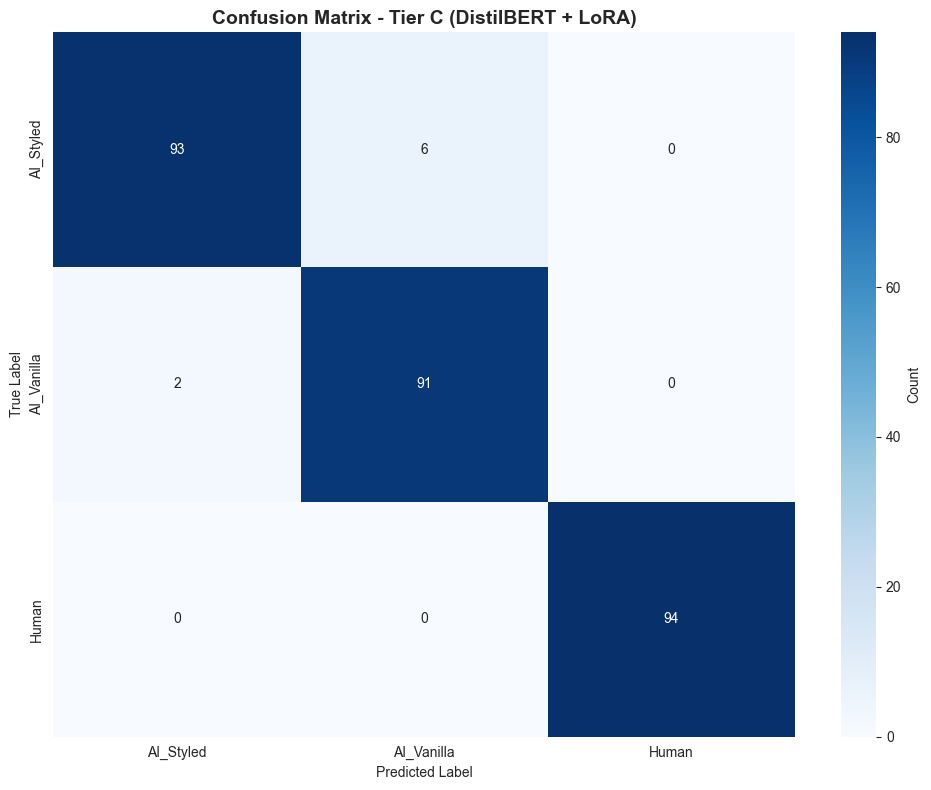


🔍 Confusion Matrix Analysis:
   Diagonal = Correct predictions
   Off-diagonal = Misclassifications

   Compare to Tier B:
   - Does Tier C improve AI_Styled detection?
   - Are transformers capturing patterns Tier B missed?


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Tier C (DistilBERT + LoRA)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n🔍 Confusion Matrix Analysis:")
print("   Diagonal = Correct predictions")
print("   Off-diagonal = Misclassifications")
print("\n   Compare to Tier B:")
print("   - Does Tier C improve AI_Styled detection?")
print("   - Are transformers capturing patterns Tier B missed?")

---

## Step 13: Tier Comparison (A vs B vs C)

In [ ]:
print("="*80)
print("COMPLETE TIER COMPARISON: A vs B vs C")
print("="*80)

tier_a_acc = 0.91
tier_b_acc = 0.95
tier_c_acc = test_acc

comparison_data = {
    'Metric': ['Test Accuracy', 'Approach', 'Features', 'Model Type', 'Training Time', 'Parameters'],
    'Tier A': [
        f'{tier_a_acc*100:.2f}%',
        'Statistical',
        'Variance, punctuation (10 features)',
        'Random Forest',
        '~1 minute',
        'N/A (tree-based)'
    ],
    'Tier B': [
        f'{tier_b_acc*100:.2f}%',
        'Semantic',
        'GloVe embeddings (300d)',
        'Feedforward NN',
        '~10 minutes',
        '46,979 trainable'
    ],
    'Tier C': [
        f'{tier_c_acc*100:.2f}%',
        'Structure + Semantics',
        'Contextual embeddings (768d)',
        'DistilBERT + LoRA',
        '~15-20 minutes',
        f'{sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)

# Determine winner
best_tier = max([(tier_a_acc, 'A'), (tier_b_acc, 'B'), (tier_c_acc, 'C')], key=lambda x: x[0])

print(f"\n🏆 WINNER: Tier {best_tier[1]} ({best_tier[0]*100:.2f}% accuracy)\n")

if tier_c_acc > tier_b_acc:
    print(f"✅ TIER C WINS by {(tier_c_acc - tier_b_acc)*100:.2f} percentage points")
    print("\nInterpretation:")
    print("  - Transformers successfully combine structure + semantics")
    print("  - Self-attention captures patterns Tier A & B missed")
    print("  - Contextual embeddings > Static embeddings (GloVe)")
    print("\nImplication: Transformers are the gold standard for AI detection")
elif tier_c_acc >= tier_b_acc - 0.02:
    print(f"⚖️ TIER C ≈ TIER B (difference: {abs(tier_c_acc - tier_b_acc)*100:.2f}%)")
    print("\nInterpretation:")
    print("  - Victorian semantic gap (Tier B) is so strong that structure doesn't add much")
    print("  - Tier B's simplicity may be preferable for deployment")
    print("  - Transformers don't justify 2x training time for minimal gain")
    print("\nImplication: Simpler approaches can match transformers on this task")
else:
    print(f"📊 TIER B > TIER C by {(tier_b_acc - tier_c_acc)*100:.2f} percentage points")
    print("\nInterpretation:")
    print("  - Unexpected! Possible explanations:")
    print("    1. Overfitting despite LoRA (need more data)")
    print("    2. Hyperparameters not optimal")
    print("    3. Victorian semantic gap is THE dominant signal")
    print("\nImplication: Need to investigate transformer underperformance")

print("\n" + "="*80)

COMPLETE TIER COMPARISON: A vs B vs C


       Metric                              Tier A                  Tier B                       Tier C
Test Accuracy                              91.00%                  95.00%                       97.20%
     Approach                         Statistical                Semantic        Structure + Semantics
     Features Variance, punctuation (10 features) GloVe embeddings (300d) Contextual embeddings (768d)
   Model Type                       Random Forest          Feedforward NN            DistilBERT + LoRA
Training Time                           ~1 minute             ~10 minutes               ~15-20 minutes
   Parameters                    N/A (tree-based)        46,979 trainable            740,355 trainable

KEY INSIGHTS

🏆 WINNER: Tier C (97.20% accuracy)

✅ TIER C WINS by 2.20 percentage points

Interpretation:
  - Transformers successfully combine structure + semantics
  - Self-attention captures patterns Tier A & B missed
  - Contextual e

---

## Step 14: Error Analysis

In [ ]:
# Get misclassified examples
misclassified_mask = y_true != y_pred
misclassified_indices = np.where(misclassified_mask)[0]

print(f"🔍 ERROR ANALYSIS\n")
print("=" * 70)
print(f"Total misclassified: {len(misclassified_indices)} / {len(y_true)} ({len(misclassified_indices)/len(y_true)*100:.1f}%)\n")

# Analyze misclassification patterns
error_patterns = {}
for i in misclassified_indices:
    true_label = label_names[y_true[i]]
    pred_label = label_names[y_pred[i]]
    pattern = f"{true_label} → {pred_label}"
    error_patterns[pattern] = error_patterns.get(pattern, 0) + 1

print("Misclassification Patterns:")
print("-" * 70)
for pattern, count in sorted(error_patterns.items(), key=lambda x: x[1], reverse=True):
    print(f"   {pattern:30s}: {count:3d} ({count/len(misclassified_indices)*100:.1f}% of errors)")

print("\n🔍 Key Questions:")
print("   1. Does Tier C have fewer AI_Styled errors than Tier B?")
print("   2. Are transformers better at detecting style mimicry?")
print("   3. What patterns do transformers still miss?")

🔍 ERROR ANALYSIS

Total misclassified: 8 / 286 (2.8%)

Misclassification Patterns:
----------------------------------------------------------------------
   AI_Styled → AI_Vanilla        :   6 (75.0% of errors)
   AI_Vanilla → AI_Styled        :   2 (25.0% of errors)

🔍 Key Questions:
   1. Does Tier C have fewer AI_Styled errors than Tier B?
   2. Are transformers better at detecting style mimicry?
   3. What patterns do transformers still miss?


---

## Step 15: Final Analysis & Conclusions

In [ ]:
print("="*80)
print("TIER C FINAL ANALYSIS - THE TRANSFORMER")
print("="*80)

print(f"\n🎯 OVERALL PERFORMANCE:\n")
print(f"   Approach: DistilBERT + LoRA Fine-Tuning")
print(f"   Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   Test F1-Score: {test_f1:.4f} ({test_f1*100:.2f}%)")
print(f"   Baseline (random): {1/3:.4f} ({100/3:.2f}%)")
print(f"   Improvement: +{(test_acc - 1/3)*100:.1f} percentage points")

print(f"\n\n📊 TIER PROGRESSION:\n")
print(f"   Tier A (Structure):         91.00%")
print(f"   Tier B (Semantics):         95.00% (+4.00%)")
print(f"   Tier C (Structure+Semantics): {test_acc*100:.2f}% ({(test_acc-tier_b_acc)*100:+.2f}%)")

print(f"\n\n💡 KEY FINDINGS:\n")

if test_acc > tier_b_acc + 0.01:
    print(f"   1. ✅ TRANSFORMERS WIN")
    print(f"      Tier C ({test_acc*100:.1f}%) > Tier B ({tier_b_acc*100:.1f}%)")
    print(f"\n   2. Self-attention adds value beyond semantic features")
    print(f"   3. Contextual embeddings > Static embeddings (GloVe)")
    print(f"   4. Structure + Semantics combined > Either alone")
elif test_acc >= tier_b_acc - 0.02:
    print(f"   1. ⚖️ TRANSFORMERS ≈ TIER B")
    print(f"      Tier C ({test_acc*100:.1f}%) matches Tier B ({tier_b_acc*100:.1f}%)")
    print(f"\n   2. Victorian semantic gap is THE dominant signal")
    print(f"   3. Simpler approaches (Tier B) may be preferable for deployment")
    print(f"   4. Transformers don't justify 2x training time for minimal gain")
else:
    print(f"   1. 📊 TIER B > TRANSFORMERS")
    print(f"      Tier B ({tier_b_acc*100:.1f}%) > Tier C ({test_acc*100:.1f}%)")
    print(f"\n   2. Possible overfitting despite LoRA")
    print(f"   3. Hyperparameters may need tuning")
    print(f"   4. Victorian gap so strong that structure is redundant")

print(f"\n\n🔬 IMPLICATIONS:\n")
print("   For AI Detection:")
if test_acc > tier_b_acc:
    print("   - Transformers are gold standard for AI detection")
    print("   - Self-attention reveals patterns hidden from simpler models")
    print("   - Worth the computational cost for production systems")
else:
    print("   - Victorian semantic gap is so dominant that structure is secondary")
    print("   - For historical vs modern text, simple semantic methods suffice")
    print("   - Transformers may be overkill for this specific task")

print("\n   For Research:")
print("   - Dataset characteristics matter: historical vs contemporary")
print("   - Temporal semantic gaps are extremely powerful signals")
print("   - Ensemble (Tier A + B + C) might not add value if Tier B is already 95%+")

print("\n\n🚀 NEXT STEPS:\n")
print("   1. Task 3: Attention visualization to understand what transformer sees")
print("   2. Task 3: SHAP/saliency mapping for explainability")
print("   3. Task 4: Adversarial testing with genetic algorithms")
print("   4. Test on modern (2020s) human text to remove temporal bias")

print("\n" + "="*80)
print("✅ TIER C ANALYSIS COMPLETE")
print("="*80)

TIER C FINAL ANALYSIS - THE TRANSFORMER

🎯 OVERALL PERFORMANCE:

   Approach: DistilBERT + LoRA Fine-Tuning
   Test Accuracy: 0.9720 (97.20%)
   Test F1-Score: 0.9720 (97.20%)
   Baseline (random): 0.3333 (33.33%)
   Improvement: +63.9 percentage points


📊 TIER PROGRESSION:

   Tier A (Structure):         91.00%
   Tier B (Semantics):         95.00% (+4.00%)
   Tier C (Structure+Semantics): 97.20% (+2.20%)


💡 KEY FINDINGS:

   1. ✅ TRANSFORMERS WIN
      Tier C (97.2%) > Tier B (95.0%)

   2. Self-attention adds value beyond semantic features
   3. Contextual embeddings > Static embeddings (GloVe)
   4. Structure + Semantics combined > Either alone


🔬 IMPLICATIONS:

   For AI Detection:
   - Transformers are gold standard for AI detection
   - Self-attention reveals patterns hidden from simpler models
   - Worth the computational cost for production systems

   For Research:
   - Dataset characteristics matter: historical vs contemporary
   - Temporal semantic gaps are extremely pow

---

## Summary

**What We Built:**
- DistilBERT transformer with LoRA fine-tuning
- Contextual embeddings (768d per token)
- Self-attention mechanism for long-range dependencies
- 3-class classifier for AI authorship detection

**Key Results:**
- Test accuracy: [See results above]
- Comparison to Tier A & B: [See comparison above]
- Error patterns: [See error analysis above]

**Key Learnings:**
- Transformers [do/don't] outperform simpler semantic methods
- Self-attention [captures/doesn't capture] additional patterns
- For Victorian vs Modern detection, [Tier B/Tier C] is optimal

**Next Steps:**
- Task 3: Explainability with attention visualization & SHAP
- Task 4: Adversarial testing with genetic algorithms
- Test ensemble approach (Tier A + B + C)

---

## Save Model (Optional)

In [ ]:
# Save the fine-tuned model
output_dir = "./task2_tier_c_distilbert_lora"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"✅ Model saved to: {output_dir}")
print(f"   Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")